<a href="https://colab.research.google.com/github/Matheusbcy/-Data-Science-IA-/blob/main/Series_Temporais2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.26.4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from prophet import Prophet

In [3]:
dataset = pd.read_csv("acoes.csv", usecols= ["Date", "MGLU"])
dataset

,Date,MGLU
0,2015-01-02,0.232812
1,2015-01-05,0.237187
2,2015-01-06,0.234062
3,2015-01-07,0.241875
4,2015-01-08,0.240000
...,...,...
1441,2020-10-27,25.450001
1442,2020-10-28,24.629999
1443,2020-10-29,25.360001
1444,2020-10-30,24.629999


In [32]:
test = dataset[1081:]
test.shape

(365, 2)

In [4]:
dataset = dataset[["Date", "MGLU"]].rename(columns = {"Date": "ds", "MGLU": "y"})
dataset

,ds,y
0,2015-01-02,0.232812
1,2015-01-05,0.237187
2,2015-01-06,0.234062
3,2015-01-07,0.241875
4,2015-01-08,0.240000
...,...,...
1441,2020-10-27,25.450001
1442,2020-10-28,24.629999
1443,2020-10-29,25.360001
1444,2020-10-30,24.629999


In [5]:
model = Prophet()
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsmuw2fva/j6otb89g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsmuw2fva/mcmjs2qg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67977', 'data', 'file=/tmp/tmpsmuw2fva/j6otb89g.json', 'init=/tmp/tmpsmuw2fva/mcmjs2qg.json', 'output', 'file=/tmp/tmpsmuw2fva/prophet_model63jsqexh/prophet_model-20250731171755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods = 90)
prev = model.predict(future)

In [7]:
prev.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1531,2021-01-28,25.423988,24.447974,26.838657,25.332147,25.544027,0.147794,0.147794,0.147794,0.076100,0.076100,0.076100,0.071694,0.071694,0.071694,0.0,0.0,0.0,25.571782
1532,2021-01-29,25.458723,24.397654,26.848627,25.364035,25.581329,0.148146,0.148146,0.148146,0.083935,0.083935,0.083935,0.064211,0.064211,0.064211,0.0,0.0,0.0,25.606869
1533,2021-01-30,25.493459,24.118891,26.526647,25.396164,25.619712,-0.136360,-0.136360,-0.136360,-0.193259,-0.193259,-0.193259,0.056898,0.056898,0.056898,0.0,0.0,0.0,25.357099
1534,2021-01-31,25.528195,24.184743,26.522972,25.429260,25.659873,-0.143390,-0.143390,-0.143390,-0.193259,-0.193259,-0.193259,0.049869,0.049869,0.049869,0.0,0.0,0.0,25.384805
1535,2021-02-01,25.562930,24.491087,26.871745,25.460765,25.697316,0.089853,0.089853,0.089853,0.046633,0.046633,0.046633,0.043220,0.043220,0.043220,0.0,0.0,0.0,25.652783


## Grafico de previsões

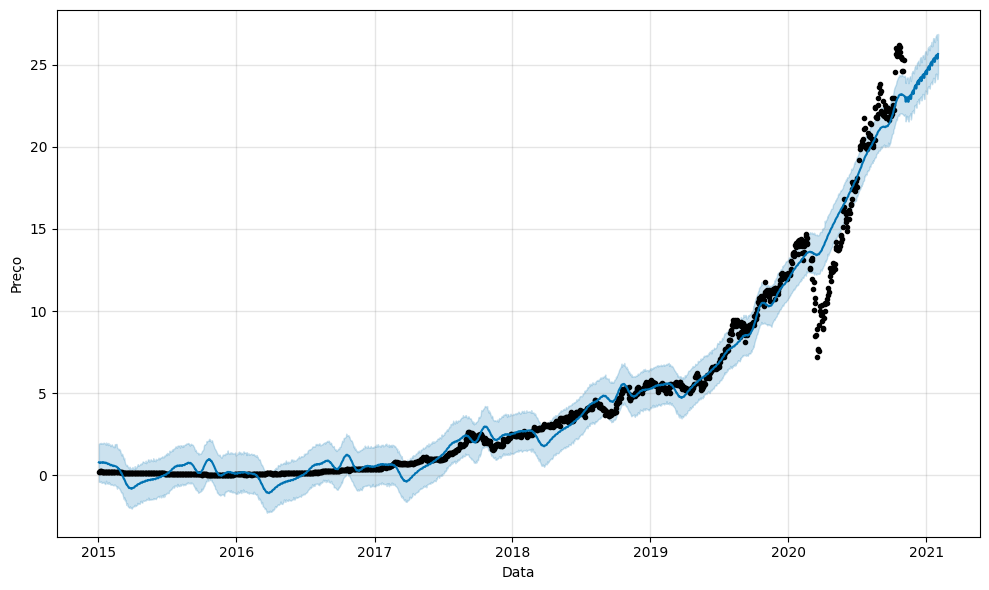

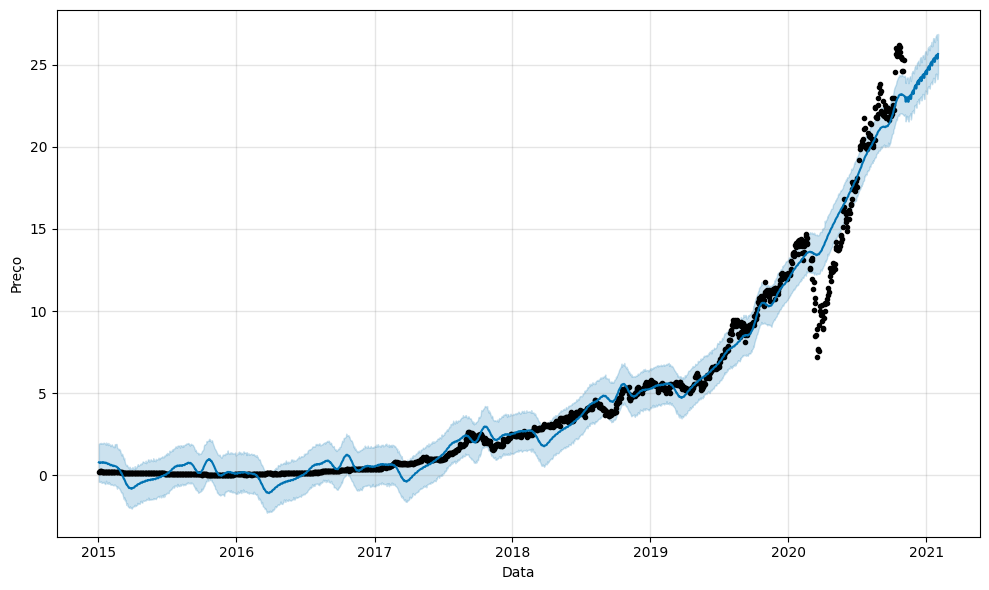

In [19]:
model.plot(prev, xlabel = "Data", ylabel = "Preço")

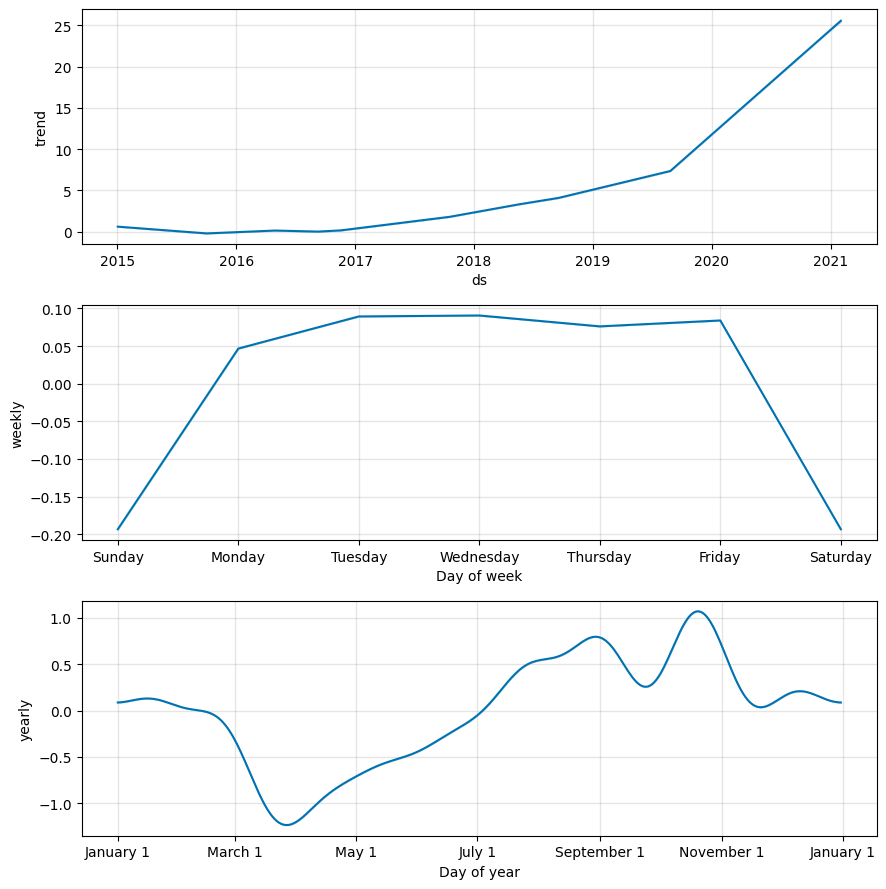

In [20]:
model.plot_components(prev);

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly

In [23]:
plot_plotly(model, prev)

In [24]:
plot_components_plotly(model, prev)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



## Avaliação

In [25]:
pred = model.make_future_dataframe(periods = 0)
prev = model.predict(pred)
prev.shape

(1446, 19)

In [26]:
prev.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1441,2020-10-27,22.193576,21.970635,24.359160,22.193576,22.193576,1.010742,1.010742,1.010742,0.089292,0.089292,0.089292,0.921450,0.921450,0.921450,0.0,0.0,0.0,23.204318
1442,2020-10-28,22.228312,22.065509,24.457912,22.228312,22.228312,0.971232,0.971232,0.971232,0.090557,0.090557,0.090557,0.880675,0.880675,0.880675,0.0,0.0,0.0,23.199544
1443,2020-10-29,22.263047,21.999458,24.329428,22.263047,22.263047,0.912411,0.912411,0.912411,0.076100,0.076100,0.076100,0.836311,0.836311,0.836311,0.0,0.0,0.0,23.175459
1444,2020-10-30,22.297783,21.945376,24.280503,22.297783,22.297783,0.872861,0.872861,0.872861,0.083935,0.083935,0.083935,0.788926,0.788926,0.788926,0.0,0.0,0.0,23.170644
1445,2020-11-03,22.436725,21.959066,24.329047,22.436725,22.436725,0.670665,0.670665,0.670665,0.089292,0.089292,0.089292,0.581373,0.581373,0.581373,0.0,0.0,0.0,23.107391


In [27]:
prev = prev["yhat"].tail(365)

In [28]:
prev

,yhat
1081,5.810243
1082,5.870948
1083,5.889897
1084,5.892778
1085,5.917628
...,...
1441,23.204318
1442,23.199544
1443,23.175459
1444,23.170644


In [38]:
test.drop(["ds"], axis = 1)

,y
1081,5.625630
1082,5.570310
1083,5.406250
1084,5.218750
1085,5.275630
...,...
1441,25.450001
1442,24.629999
1443,25.360001
1444,24.629999


In [ ]:
prev

In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['y'], prev)

In [46]:
mae

1.1139294323903237